<a href="https://colab.research.google.com/github/Tusharkp05/Capstone-COVID-19/blob/main/Capstone_Proj_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing required libraries:-
!pip install plotly prophet --quiet

In [ ]:
# Importing libraries:-
import pandas as pd
import plotly.express as px
from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
# Uploading the CSV file:-
from google.colab import files
uploaded = files.upload()


Saving COVID 19 dataset.csv to COVID 19 dataset (1).csv


In [ ]:
# Viewing the uploaded file:-
print(uploaded)

{'COVID 19 dataset (1).csv': b"Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region\r\n,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean\r\n,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe\r\n,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa\r\n,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe\r\n,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa\r\n,Antigua and Barbuda,17.0608,-61.7964,2020-01-22,0,0,0,0,Americas\r\n,Argentina,-38.4161,-63.6167,2020-01-22,0,0,0,0,Americas\r\n,Armenia,40.0691,45.0382,2020-01-22,0,0,0,0,Europe\r\nAustralian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0,0,Western Pacific\r\nNew South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,Western Pacific\r\nNorthern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0,0,Western Pacific\r\nQueensland,Australia,-27.4698,153.0251,2020-01-22,0,0,0,0,Western Pacific\r\nSouth Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0,0,We

In [ ]:
# Loading the dataset:-
df = pd.read_csv("COVID 19 dataset.csv")
df.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [ ]:
# Checking for null values:-
print("Missing values:\n", df.isnull().sum())

Missing values:
 Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


In [ ]:
# Previewing column names:-
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'WHO Region']


In [ ]:
# Converting date column:-
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Line plot of confirmed cases:-
fig = px.line(df, x='Date', y='Confirmed', title='COVID-19 Confirmed Cases Over Time')
fig.show()

In [ ]:
# Line plot for deaths and recoveries:-
fig2 = px.line(df, x='Date', y=['Deaths', 'Recovered'], title='Deaths and Recoveries Over Time')
fig2.show()

In [ ]:
# Preparing data for forecasting:-
forecast_df = df[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})

# Initializing and fitting model:-
model = Prophet()
model.fit(forecast_df)

# Predicting for next 7 days:-
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0_zyc3zb/kf1_fntm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0_zyc3zb/9hftrryg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67975', 'data', 'file=/tmp/tmp0_zyc3zb/kf1_fntm.json', 'init=/tmp/tmp0_zyc3zb/9hftrryg.json', 'output', 'file=/tmp/tmp0_zyc3zb/prophet_model2u74ngqb/prophet_model-20250620104758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:47:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:48:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


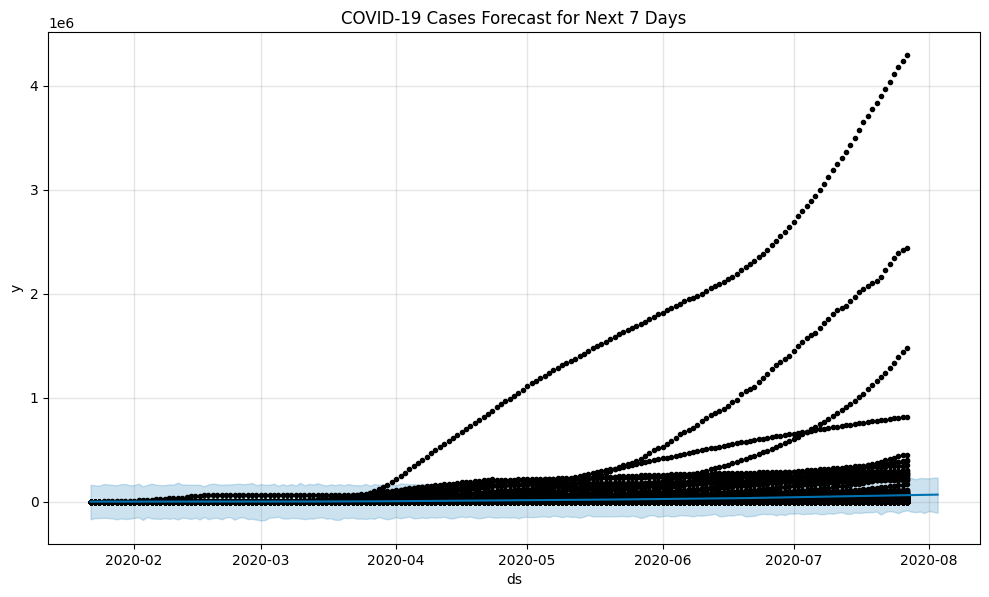

In [ ]:
# Plotting forecast:-
fig3 = model.plot(forecast)
plt.title("COVID-19 Cases Forecast for Next 7 Days")
plt.show()